In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [86]:
# Dataset exploration
fname = "data/a_example.in"
def read(fname):
    with open(fname, 'r') as file:
        meta = file.readline().rstrip()
        [R, C, F, N, B, T] = [int(i) for i in meta.split(' ')]
        rides = []
        for i in range(N):
            tmp = file.readline().rstrip()
            rides += [[int(i) for i in tmp.split(' ')]]
    print(fname)
    print(f"Rows: {R}, Cols: {C}, Vehicles: {F}, Rides: {N}, Bonus: {B}, Timesteps: {T}")

    rides = np.array(rides)
    print(f"Latest start ride: {np.max(rides[:, 4])}")
    print(f"Latest end ride: {np.max(rides[:, 5])}")
    print(f"Earliest start ride: {np.min(rides[:, 4])}")
    print(f"Earliest end ride: {np.min(rides[:, 5])}")

    return [R, C, F, N, B, T], rides

# Ride: a, b, x, y, s, f

In [28]:
def ride_len_dist(rides):
    # Get lengths 
    lens = np.abs(rides[:, 0] - rides[:, 2]) + np.abs(rides[:, 1] - rides[:, 3])

    fig, ax = plt.subplots()
    ax.hist(lens, bins=np.arange(min(lens), max(lens)+1, 1))
    ax.set_xlabel("Ride length")
    ax.set_ylabel("Freq")
    print(f"Average length: {np.average(lens)}, min: {np.min(lens)}, max: {np.max(lens)}")

In [89]:
def plot_starts(rides):
    # Normalize start times 
    a = np.max(rides[:, 4]) or 1
    b = np.max(rides[:, 5]) or 1
    starts = rides[:, 4]/a
    ends = rides[:, 5]/b

    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
    ax[0].scatter(rides[:, 0], rides[:, 1], c=plt.cm.viridis(starts))
    ax[0].set_title("Start points")
    
    
    s = ax[1].scatter(rides[:, 2], rides[:, 3], c=plt.cm.viridis(ends))
    ax[1].set_title("End points")

    for ride in rides:
        ax[2].plot([ride[0], ride[2]],[ride[1], ride[3]])
    ax[2].set_title("Dirs")

    fig.set_size_inches(15, 5)
    plt.show()

In [80]:
def max_score(rides, bonus):
    lens = np.abs(rides[:, 0] - rides[:, 2]) + np.abs(rides[:, 1] - rides[:, 3])
    return np.sum(lens) + len(lens)*bonus

## A

data/a_example.in
Rows: 3, Cols: 4, Vehicles: 2, Rides: 3, Bonus: 2, Timesteps: 10
Average length: 2.6666666666666665, min: 2, max: 4


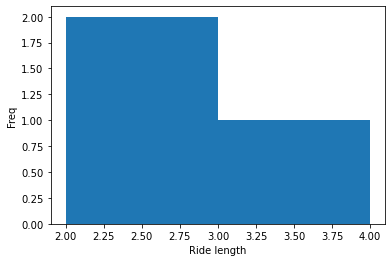

In [66]:
fname = "data/a_example.in"
[R, C, F, N, B, T], rides = read(fname)
ride_len_dist(rides)

data/a_example.in
Rows: 3, Cols: 4, Vehicles: 2, Rides: 3, Bonus: 2, Timesteps: 10
Latest start ride: 2
Latest end ride: 9
Earlyest start ride: 0
Earlyest end ride: 9


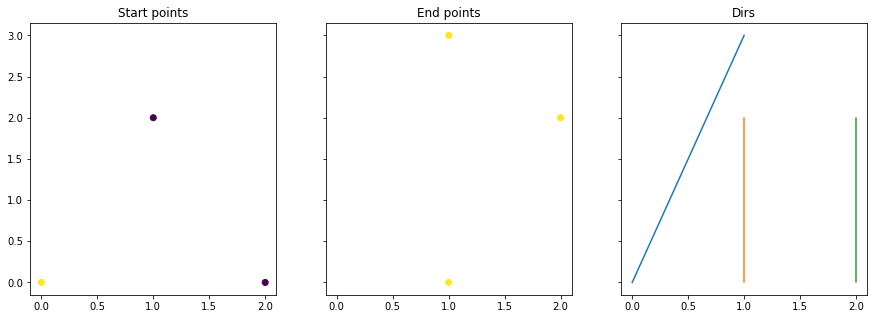

In [87]:
fname = "data/a_example.in"
[R, C, F, N, B, T], rides = read(fname)
plot_starts(rides)

In [82]:
fname = "data/a_example.in"
[R, C, F, N, B, T], rides = read(fname)
m = max_score(rides, B)
print(f"Max score {m}")

data/a_example.in
Rows: 3, Cols: 4, Vehicles: 2, Rides: 3, Bonus: 2, Timesteps: 10
Max score 14


## B

data/b_should_be_easy.in
Rows: 800, Cols: 1000, Vehicles: 100, Rides: 300, Bonus: 25, Timesteps: 25000
Average length: 577.66, min: 32, max: 1463


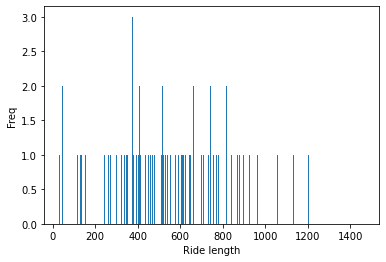

In [30]:
fname = "data/b_should_be_easy.in"
[R, C, F, N, B, T], rides = read(fname)
ride_len_dist(rides)

data/b_should_be_easy.in
Rows: 800, Cols: 1000, Vehicles: 100, Rides: 300, Bonus: 25, Timesteps: 25000
Latest start ride: 24453
Latest end ride: 24999
Earlyest start ride: 186
Earlyest end ride: 656


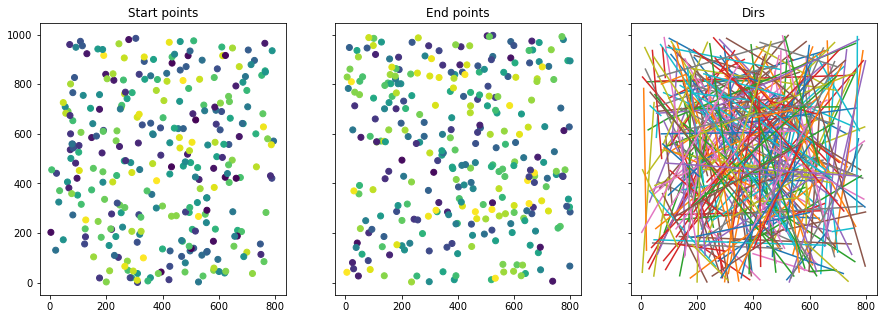

In [90]:
fname = "data/b_should_be_easy.in"
[R, C, F, N, B, T], rides = read(fname)
plot_starts(rides)

In [83]:
fname = "data/b_should_be_easy.in"
[R, C, F, N, B, T], rides = read(fname)
m = max_score(rides, B)
print(f"Max score {m}")

data/b_should_be_easy.in
Rows: 800, Cols: 1000, Vehicles: 100, Rides: 300, Bonus: 25, Timesteps: 25000
Max score 180798


## C

data/c_no_hurry.in
Rows: 3000, Cols: 2000, Vehicles: 81, Rides: 10000, Bonus: 1, Timesteps: 200000
Average length: 1674.0973, min: 8, max: 4597


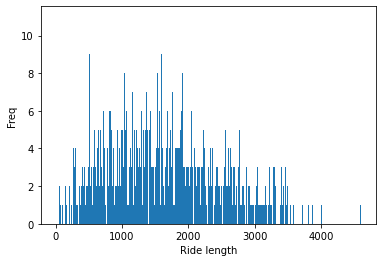

In [31]:
fname = "data/c_no_hurry.in"
[R, C, F, N, B, T], rides = read(fname)
ride_len_dist(rides)

data/c_no_hurry.in
Rows: 3000, Cols: 2000, Vehicles: 81, Rides: 10000, Bonus: 1, Timesteps: 200000
Latest start ride: 0
Latest end ride: 200000
Earlyest start ride: 0
Earlyest end ride: 200000


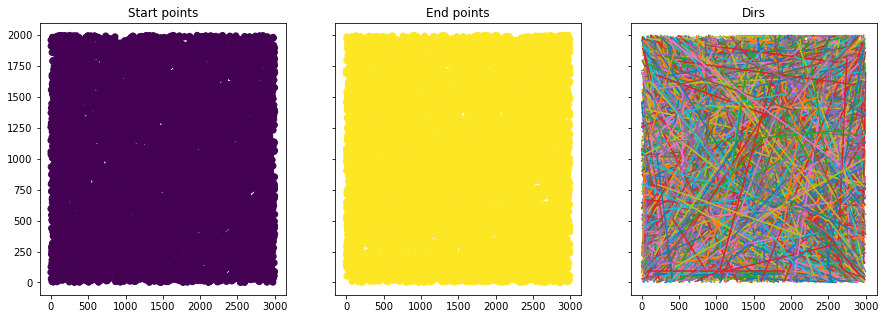

In [91]:
fname = "data/c_no_hurry.in"
[R, C, F, N, B, T], rides = read(fname)
plot_starts(rides)

In [84]:
fname = "data/c_no_hurry.in"
[R, C, F, N, B, T], rides = read(fname)
m = max_score(rides, B)
print(f"Max score {m}")

data/c_no_hurry.in
Rows: 3000, Cols: 2000, Vehicles: 81, Rides: 10000, Bonus: 1, Timesteps: 200000
Max score 16750973


## D

data/d_metropolis.in
Rows: 10000, Cols: 10000, Vehicles: 400, Rides: 10000, Bonus: 2, Timesteps: 50000
Average length: 1425.2704, min: 27, max: 16898


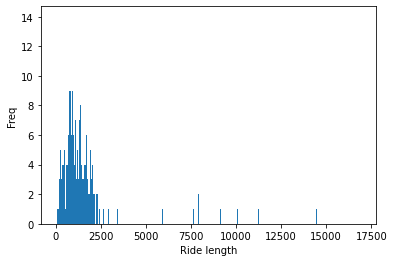

In [51]:
fname = "data/d_metropolis.in"
[R, C, F, N, B, T], rides = read(fname)
ride_len_dist(rides)

data/d_metropolis.in
Rows: 10000, Cols: 10000, Vehicles: 400, Rides: 10000, Bonus: 2, Timesteps: 50000
Latest start ride: 49766
Latest end ride: 50000
Earlyest start ride: 1
Earlyest end ride: 2597


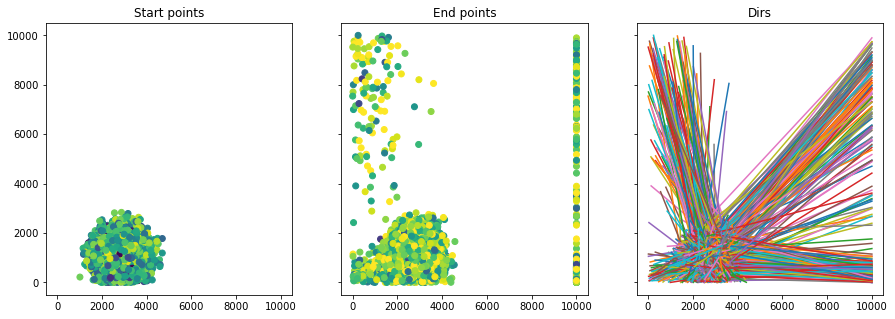

In [92]:
fname = "data/d_metropolis.in"
[R, C, F, N, B, T], rides = read(fname)
plot_starts(rides)

In [94]:
fname = "data/d_metropolis.in"
[R, C, F, N, B, T], rides = read(fname)
m = max_score(rides, B)
print(f"Max score {m:,}")

data/d_metropolis.in
Rows: 10000, Cols: 10000, Vehicles: 400, Rides: 10000, Bonus: 2, Timesteps: 50000
Latest start ride: 49766
Latest end ride: 50000
Earlyest start ride: 1
Earlyest end ride: 2597
Max score 14,272,704


## E

data/e_high_bonus.in
Rows: 1500, Cols: 2000, Vehicles: 350, Rides: 10000, Bonus: 1000, Timesteps: 150000
Average length: 1160.1343, min: 14, max: 3190


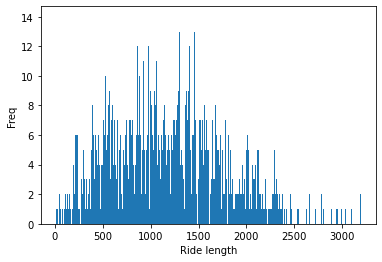

In [33]:
fname = "data/e_high_bonus.in"
[R, C, F, N, B, T], rides = read(fname)
ride_len_dist(rides)

data/e_high_bonus.in
Rows: 1500, Cols: 2000, Vehicles: 350, Rides: 10000, Bonus: 1000, Timesteps: 150000
Latest start ride: 149914
Latest end ride: 149997
Earlyest start ride: 15
Earlyest end ride: 901


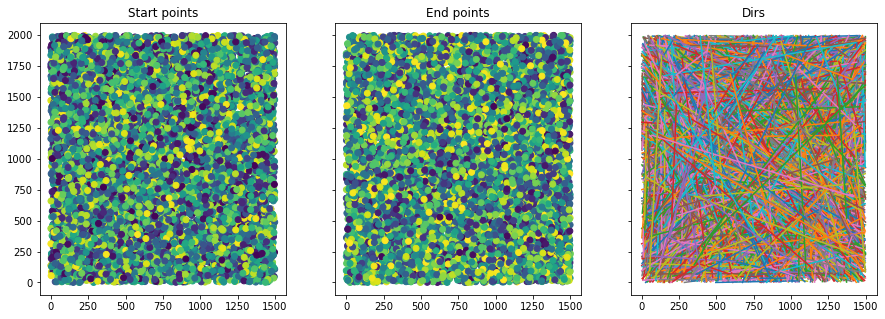

In [93]:
fname = "data/e_high_bonus.in"
[R, C, F, N, B, T], rides = read(fname)
plot_starts(rides)

In [95]:
fname = "data/e_high_bonus.in"
[R, C, F, N, B, T], rides = read(fname)
m = max_score(rides, B)
print(f"Max score {m:,}")

data/e_high_bonus.in
Rows: 1500, Cols: 2000, Vehicles: 350, Rides: 10000, Bonus: 1000, Timesteps: 150000
Latest start ride: 149914
Latest end ride: 149997
Earlyest start ride: 15
Earlyest end ride: 901
Max score 21,601,343
